In [1]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


In [2]:
##Lectura de datos
datos = pd.read_csv("data_desafio_seguros")
datos.head()

,row_id,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,320,A12,30,A34,A40,4249,A61,A71,4,A94,...,A123,28,A143,A152,2,A174,1,A191,A201,2
1,211,A14,36,A32,A43,3835,A65,A75,2,A92,...,A121,45,A143,A152,1,A172,1,A192,A201,1
2,23,A12,12,A34,A41,1804,A62,A72,3,A93,...,A122,44,A143,A152,1,A173,1,A191,A201,1
3,439,A13,12,A31,A49,609,A61,A72,4,A92,...,A121,26,A143,A152,1,A171,1,A191,A201,2
4,237,A12,21,A32,A49,2767,A62,A75,4,A91,...,A123,61,A141,A151,2,A172,1,A191,A201,2


In [3]:
#determinar el cuantil al 25% para categorizar atributos numéricos
datos.quantile(.25)


row_id     253.75
1           12.00
4         1382.00
7            2.00
10           2.00
12          27.00
15           1.00
17           1.00
20           1.00
Name: 0.25, dtype: float64

In [4]:
#determinar el cuantil al 50% para categorizar atributos numéricos
datos.quantile(.5)


row_id     504.5
1           18.0
4         2328.0
7            3.0
10           3.0
12          33.0
15           1.0
17           1.0
20           1.0
Name: 0.5, dtype: float64

In [5]:
#determinar el cuantil al 75% para categorizar atributos numéricos
datos.quantile(.75)

row_id     750.5
1           24.0
4         3994.0
7            4.0
10           4.0
12          42.0
15           2.0
17           1.0
20           2.0
Name: 0.75, dtype: float64

In [6]:
#elimina fila id
drop_elements = ['row_id']
datos_ = datos.drop(drop_elements, axis=1)
datos_.head()



,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A12,30,A34,A40,4249,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2
1,A14,36,A32,A43,3835,A65,A75,2,A92,A101,...,A121,45,A143,A152,1,A172,1,A192,A201,1
2,A12,12,A34,A41,1804,A62,A72,3,A93,A101,...,A122,44,A143,A152,1,A173,1,A191,A201,1
3,A13,12,A31,A49,609,A61,A72,4,A92,A101,...,A121,26,A143,A152,1,A171,1,A191,A201,2
4,A12,21,A32,A49,2767,A62,A75,4,A91,A101,...,A123,61,A141,A151,2,A172,1,A191,A201,2


In [7]:
def mapeo(datos):
    drop_elements = ['row_id']
    datos_ = datos.drop(drop_elements, axis=1)
    
    datos_['0'] = datos['0'].map( 
        {
        'A11': 1,
        'A12': 2,
        'A13': 3,
        'A14': 4
        }
    ).astype(int)
    ######
    datos.loc[datos['1']<=12, '1_encoded' ] = 1
    datos.loc[(datos['1']<=18) & (datos['1']>12),'1_encoded']= 2
    datos.loc[(datos['1']<=24) & (datos['1']>18), '1_encoded' ] = 3
    datos.loc[datos['1']>24,'1_encoded' ] = 4
    datos_['1'] = datos['1_encoded']
    ######
    datos_['2'] = datos['2'].map( 
        {
        'A30': 1,
        'A31': 2,
        'A32': 3,
        'A33': 4,
        'A34': 5
        }
    ).astype(int)
    ######
    datos_['3'] = datos['3'].map( 
        {
        'A40': 1,
        'A41': 2,
        'A410': 2,
        'A42': 3,
        'A43': 4,
        'A44': 5,
        'A45': 6,
        'A46': 7,
        'A47': 8,
        'A48': 9,
        'A49': 10,
        'A50': 11
        }
    ).astype(int)
    ######
    datos.loc[datos['4']<=1382, '4_encoded' ] = 1
    datos.loc[(datos['4']<=2328) & (datos['4']>1382),'4_encoded']= 2
    datos.loc[(datos['4']<=3994) & (datos['4']>2328), '4_encoded' ] = 3
    datos.loc[datos['4']>3994, '4_encoded' ] = 4
    datos_['4'] = datos['4_encoded']

    #####
    datos_['5'] = datos['5'].map( 
        {
        'A61': 1,
        'A62': 2,
        'A63': 3,
        'A64': 4,
        'A65': 5,
        }
    ).astype(int)
    #####
    datos_['6'] = datos['6'].map( 
        {
        'A71': 1,
        'A72': 2,
        'A73': 3,
        'A74': 4,
        'A75': 5,
        }
    ).astype(int)
    #####
    datos.loc[datos['7']<=2, '7_encoded' ] = 1
    datos.loc[(datos['7']<=3) & (datos['7']>2),'7_encoded']= 2
    datos.loc[(datos['7']<=4) & (datos['7']>3), '7_encoded' ] = 3
    datos.loc[datos['7']>4, '7_encoded' ] = 4
    datos_['7'] = datos['7_encoded']
    #####
    datos_['8'] = datos['8'].map( 
        {
        'A91': 1,
        'A92': 2,
        'A93': 3,
        'A94': 4,
        'A95': 5,
        }
    ).astype(int)
    #####
    datos_['9'] = datos['9'].map( 
        {
        'A101': 1,
        'A102': 2,
        'A103': 3,
        }
    ).astype(int)
    #####
    datos.loc[datos['10']<=2, '10_encoded' ] = 1
    datos.loc[(datos['10']<=3) & (datos['10']>2),'10_encoded']= 2
    datos.loc[(datos['10']<=4) & (datos['10']>3), '10_encoded' ] = 3
    datos.loc[datos['10']>4, '10_encoded' ] = 4
    datos_['10'] = datos['10_encoded']
    #####
    datos_['11'] = datos['11'].map( 
        {
        'A121': 1,
        'A122': 2,
        'A123': 3,
        'A124': 4,

        }
    ).astype(int)
    #####
    datos.loc[datos['12']<=27, '12_encoded' ] = 1
    datos.loc[(datos['12']<=33) & (datos['12']>27),'12_encoded']= 2
    datos.loc[(datos['12']<=42) & (datos['12']>33), '12_encoded' ] = 3
    datos.loc[datos['12']>42, '12_encoded' ] = 4
    datos_['12'] = datos['12_encoded']
    #####
    datos_['13'] = datos['13'].map( 
        {
        'A141': 1,
        'A142': 2,
        'A143': 3,  
        }
    ).astype(int)
    #####
    datos_['14'] = datos['14'].map( 
        {
        'A151': 1,
        'A152': 2,
        'A153': 3,  
        }
    ).astype(int)
    #####
    datos.loc[datos['15']<=1, '15_encoded' ] = 1
    datos.loc[(datos['15']<=2) & (datos['15']>1),'15_encoded']= 2
    datos.loc[datos['15']>2, '15_encoded' ] = 3
    datos_['15'] = datos['15_encoded']
    #####
    datos_['16'] = datos['16'].map( 
        {
        'A171': 1,
        'A172': 2,
        'A173': 3,  
        'A174': 4
        }
    ).astype(int)
    #####
    datos_['18'] = datos['18'].map( 
        {
        'A191': 1,
        'A192': 2,
        }
    ).astype(int)
    #####
    datos_['19'] = datos['19'].map( 
        {
        'A201': 1,
        'A202': 2,
        }
    ).astype(int)
    #####
    datos_['20'] = datos['20'].map( 
        {
        1: 1,
        2: 0,
        }
    ).astype(int)
    #####


    atr_names = list(datos_.drop(['20','19'],axis =1))

    datos_.head()
    return datos_


datos_ = mapeo(datos=datos)


atr_names = list(datos_.drop(['20','19'],axis =1))

datos_.head()



,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,2,4.0,5,1,4.0,1,1,3.0,4,1,...,3,2.0,3,2,2.0,4,1,1,1,0
1,4,4.0,3,4,3.0,5,5,1.0,2,1,...,1,4.0,3,2,1.0,2,1,2,1,1
2,2,1.0,5,2,2.0,2,2,2.0,3,1,...,2,4.0,3,2,1.0,3,1,1,1,1
3,3,1.0,2,10,1.0,1,2,3.0,2,1,...,1,1.0,3,2,1.0,1,1,1,1,0
4,2,3.0,3,10,3.0,2,5,3.0,1,1,...,3,4.0,1,1,2.0,2,1,1,1,0


In [8]:
X = datos_.values[:, 0:19]
Y = datos_.values[:, 20]

#split 70%-30%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)



In [9]:
#Arbol de decision
clf = DecisionTreeClassifier(criterion='entropy',
                            min_samples_split=21,
                            min_samples_leaf=5,
                            max_depth= 4,
                            )

#Entrenar arbol de decision
clf = clf.fit(X_train, y_train)

#predecir con el conjunto de prueba
y_pred = clf.predict(X_test)



In [10]:
#Matriz de confusion
cm = confusion_matrix(y_test, y_pred)

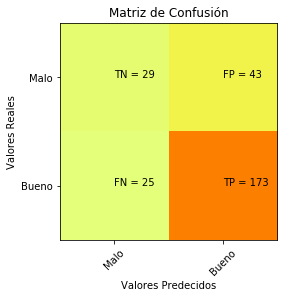

In [11]:
#Mostrar Matris de confusion
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Malo', 'Bueno']
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predecidos')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP' ], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+ " = " + str(cm[i][j]))
        
plt.show()


In [12]:
#Metricas
print("Evaluación de Clasificador:")
print("")
print("Accuracy = {0:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))
print("Precision = {0:.2f}%".format(metrics.precision_score(y_test, y_pred)*100))
print("Recall = {0:.2f}%".format(metrics.recall_score(y_test, y_pred)*100))


Evaluación de Clasificador:

Accuracy = 74.81%
Precision = 80.09%
Recall = 87.37%


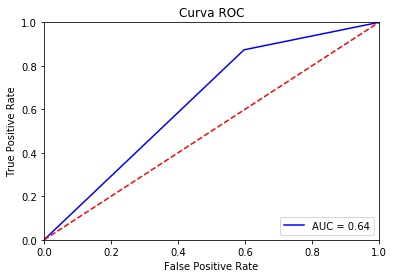

In [13]:
#Curva ROC
fpr,tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
with open(r"treeDesafio.dot",'w') as f:
    f = tree.export_graphviz(clf,
                            out_file=f,
                            max_depth=7,
                            impurity=True,
                            feature_names=atr_names,
                            class_names= ['Bueno', 'Malo'],
                            rounded=True,
                            filled = True 
                            )
    


In [15]:
#Funcion que calcula el riesgo del cliente en base a un arbol de decision
def Calcular_Riesgo (persona, decision_tree):
    
    persona_ = persona.drop(['19'],axis =1)

    x_test = pd.DataFrame(persona_)
    y_pred = decision_tree.predict(x_test.drop(['20'], axis=1))
        
    pred = y_pred[0].astype(int)
    
    if(pred == 1):
        print("Predicción = Bueno")
    else:
        print("Predicción = Malo")
    
  


    y_proba = decision_tree.predict_proba(x_test.drop(['20'], axis = 1))
    #Riesgo se calcula con la probadilidad de que sea un mal cliente, independiente de la predicción
    riesgo = (round(y_proba[0][0]*100,2))
    print("Riesgo de Cliente= ", riesgo, "%")
    p = (0.1* ((riesgo/100)))
    return p

In [16]:
probandomapeo = pd.read_csv("persona_de_prueba")


test_persona = mapeo(datos=probandomapeo)
persona_ = test_persona.drop(['19'],axis =1)




In [17]:
Score_Riesgo = Calcular_Riesgo(persona=test_persona, decision_tree=clf)

Predicción = Malo
Riesgo de Cliente=  69.7 %


In [18]:
#Funcion que calcula el valor base del seguro
def Calcular_base_Seguro(p):
    print("Base de Seguro para Cliente:", 3*(1+0.03+p), "UF")
    
    

In [19]:
Calcular_base_Seguro(p=Score_Riesgo)

Base de Seguro para Cliente: 3.2991 UF
